## 导入数据

导入包，导入数据（两个不同文件

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_excel("../02Data/完整数据_暴雨_交通_pre_tweets_TFIDF_Label.xlsx", index_col=0)
data1.head(2)

,微博正文,clean_word,clean_stopwords,Label
0,【面对暴雨，请收好这份#避险生存指南#】#蜀黍带你涨姿势#近日来，河南两小时暴雨记录又被刷新...,【面对暴雨，请收好这份#避险生存指南#】#蜀黍带你涨姿势#近日来，河南两小时暴雨记录又被刷新...,"['面对', '暴雨', '请', '收好', '这份', '避险', '生存', '指南'...",0
1,"#河南高速路况#截至2021年9月9日,19:00，目前省内高速通行情况：1、因收费站临时抢...","#河南高速路况#截至,:，目前省内高速通行情况：、因收费站临时抢修施工，菏宝高速新乡东站（北...","['河南', '高速', '路况', '截至', '目前', '省内', '高速', '通行...",1


In [6]:
data2 = pd.read_csv("../02Data/完整数据_暴雨_交通_pre_vec_TFIDF.csv")
data2.head(2)

,同学,同心,同志,同意,同比,同舟,同行,同袍,同观路,同途,...,龙口市,龙吉,龙城,龙山,龙山镇,龙庭,龙桥,龙永段,龙背,龙舟
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y= data1.iloc[:, -1]
x = data2

## 决策树
decision_tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=420)

In [10]:
from sklearn.metrics import roc_auc_score, recall_score,precision_score,f1_score

In [8]:
clf = DecisionTreeClassifier(random_state=25,max_depth=4,criterion="entropy")

clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
result=clf.predict(Xtest)
precision_score_=precision_score(Ytest, result)
recall_=recall_score(Ytest, result)
f1_score_=f1_score(Ytest, result)
auc=roc_auc_score(Ytest,result)
print(score_)
print(recall_)
print(f1_score_)
print(precision_score_)
print(auc)



0.66
0.5375
0.6277372262773723
0.7543859649122807
0.6687500000000001


In [12]:
from sklearn.ensemble import  AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore') # 这种最好还是不要用，不报错了，但结果容易有问题

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(random_state=25,max_depth=4,criterion="entropy"),
                           algorithm="SAMME",
                           learning_rate=0.3,
                           n_estimators=50,
                           random_state=420)
model = model.fit(Xtrain, Ytrain)
score_AdaDTC = model.score(Xtest, Ytest)
score_AdaDTC

0.6666666666666666

In [14]:
model.base_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=25)

In [ ]:
model.estimators_

In [61]:
a=np.arange(5,505,5)
a

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,
       330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390,
       395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
       460, 465, 470, 475, 480, 485, 490, 495, 500])

### 集成学习测试 clf = AdaBoost

In [17]:
AdaDTC_score = []
n_estimators_range = np.arange(5,505,5)
from tqdm import tqdm # 给你加一个进度条，跑得慢的就可以加，不然干等
for i in tqdm(n_estimators_range):
    clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=25,max_depth=4,criterion="entropy"),
                           algorithm="SAMME",
                           learning_rate=0.3,
                           n_estimators = i, # 这一行是我加的
                           random_state=420).fit(Xtrain, Ytrain)
    AdaDTC_score.append(clf.score(Xtest, Ytest))

 37%|███▋      | 37/100 [01:36<02:44,  2.61s/it]


KeyboardInterrupt: 

0.6666666666666666 5


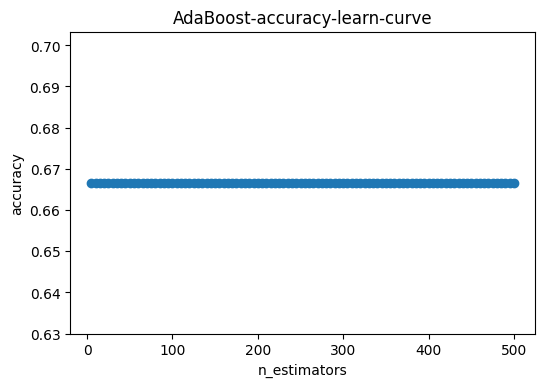

In [85]:
print(max(AdaDTC_score), n_estimators_range[AdaDTC_score.index(max(AdaDTC_score))])
plt.figure(dpi=100)
plt.plot(n_estimators_range, AdaDTC_score, marker='o')

#for a, b in zip(n_estimators_range, AdaDTC_score):
    #plt.text(a, b, "{:.3f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('AdaBoost-accuracy-learn-curve')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
#plt.savefig('SVC(kernel=rbf)-Learn-curve2.png',facecolor='white')
plt.show()

### 测试 max_depth

In [12]:
tr = []
te = []
for i in range(15):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

0.67


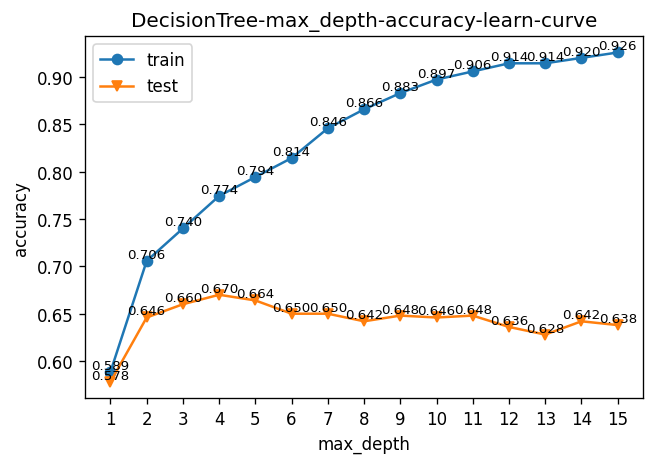

In [14]:
print(max(te))
plt.figure(dpi=120)
x_rng = np.arange(1, len(tr)+1)
plt.plot(x_rng, tr,  marker='o', label="train")
plt.plot(x_rng, te,  marker='v', label="test")
plt.xticks(x_rng)

# 设置数字标签
for a, b in zip(x_rng, te):
    plt.text(a, b, "{:.3f}".format(b), ha='center', va='bottom', fontsize=8)

for a, b in zip(x_rng, tr):
    plt.text(a, b, "{:.3f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('DecisionTree-max_depth-accuracy-learn-curve')
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.legend()
plt.savefig('Decision-learn-vurve.png',facecolor='white') # 保存图片用的
plt.show()

### 多测试测试
    ! 轻易不要跑这个数据

In [ ]:
# #! 轻易不要跑这个数据
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

In [ ]:
GS.best_params_

## 朴素贝叶斯

In [14]:
from time import time 
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [16]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import brier_score_loss as BS


name = ["Multinomial","Complement","Bournulli"]
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]

### 测试

In [18]:
for name, clf in zip(name, models):
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)
    score = clf.score(Xtest,Ytest)
    print(name)
    
    #2个标签下的布里尔分数
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(y[i],bs))
        
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under 0:0.224
	Brier under 1:0.224
	Average Brier:0.224
	Accuracy:0.640


Complement
	Brier under 0:0.222
	Brier under 1:0.222
	Average Brier:0.222
	Accuracy:0.627


Bournulli
	Brier under 0:0.383
	Brier under 1:0.383
	Average Brier:0.383
	Accuracy:0.573




In [17]:
clf=MultinomialNB().fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
result=clf.predict(Xtest)
precision_score_=precision_score(Ytest, result)
recall_=recall_score(Ytest, result)
f1_score_=f1_score(Ytest, result)
auc=roc_auc_score(Ytest,result)
print(score_)
print(recall_)
print(f1_score_)
print(precision_score_)
print(auc)

0.64
0.825
0.7096774193548386
0.6226415094339622
0.6267857142857143


In [20]:
model = AdaBoostClassifier(MultinomialNB(),
                           algorithm="SAMME",
                           learning_rate=0.3,
                           n_estimators=1000)
model = model.fit(Xtrain, Ytrain)
score_AdaMulti = model.score(Xtest, Ytest)
score_AdaMulti

0.6

In [16]:
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial"
        ,"Multinomial + Isotonic"
        ,"Multinomial + Sigmoid"
        ,"Complement"
        ,"Complement + Isotonic"
        ,"Complement + Sigmoid"
        ,"Bernoulli"
        ,"Bernoulli + Isotonic"
        ,"Bernoulli + Sigmoid"]

models = [MultinomialNB()
          ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
          ,ComplementNB()
          ,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
          ,BernoulliNB()
          ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
          ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
         ]

In [ ]:
for name,clf in zip(name,models):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)
    score = clf.score(Xtest,Ytest)
    print(name)
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(y[i],bs))
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Brier under 0:0.224
	Brier under 1:0.224
	Average Brier:0.224
	Accuracy:0.640


Multinomial + Isotonic
	Brier under 0:0.228
	Brier under 1:0.228
	Average Brier:0.228
	Accuracy:0.607


Multinomial + Sigmoid
	Brier under 0:0.220
	Brier under 1:0.220
	Average Brier:0.220
	Accuracy:0.600


Complement
	Brier under 0:0.222
	Brier under 1:0.222
	Average Brier:0.222
	Accuracy:0.627


Complement + Isotonic
	Brier under 0:0.228
	Brier under 1:0.228
	Average Brier:0.228
	Accuracy:0.607


Complement + Sigmoid
	Brier under 0:0.221
	Brier under 1:0.221
	Average Brier:0.221
	Accuracy:0.600


Bernoulli
	Brier under 0:0.383
	Brier under 1:0.383
	Average Brier:0.383
	Accuracy:0.573


Bernoulli + Isotonic
	Brier under 0:0.234
	Brier under 1:0.234
	Average Brier:0.234
	Accuracy:0.627


Bernoulli + Sigmoid
	Brier under 0:0.239
	Brier under 1:0.239
	Average Brier:0.239
	Accuracy:0.540




## 支持向量机

In [21]:
from sklearn.feature_selection import VarianceThreshold #删除方差为0的特征
selector =VarianceThreshold()
x_var0=selector.fit_transform(x)
x_var0.shape

(500, 4548)

In [21]:
import numpy as np
x.var()
np.median(x.var().values)

5.499672641527924e-05

In [22]:
from time import time 
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [24]:
times = time() 

for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    

linear 's testing accuracy 0.640000, recall is 0.587500', auc is 0.685536
00:00:631268
poly 's testing accuracy 0.533333, recall is 1.000000', auc is 0.695000
00:01:046972
rbf 's testing accuracy 0.533333, recall is 1.000000', auc is 0.694464
00:01:701575
sigmoid 's testing accuracy 0.533333, recall is 1.000000', auc is 0.695000
00:02:125669


In [23]:
clf=SVC(kernel="rbf",cache_size = 5000,gamma=2.1209508879201926).fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
result=clf.predict(Xtest)
precision_score_=precision_score(Ytest, result)
recall_=recall_score(Ytest, result)
f1_score_=f1_score(Ytest, result)
auc=roc_auc_score(Ytest,result)
print(score_)
print(recall_)
print(f1_score_)
print(precision_score_)
print(auc)


0.6466666666666666
0.6125
0.6490066225165563
0.6901408450704225
0.6491071428571429


In [26]:
model = AdaBoostClassifier(SVC(),
                           algorithm="SAMME",
                           learning_rate=0.5,
                           n_estimators=500)
model = model.fit(Xtrain, Ytrain)
score_AdaSVC = model.score(Xtest, Ytest)
score_AdaSVC

0.5333333333333333

In [27]:
Ytest.value_counts()

1    80
0    70
Name: Label, dtype: int64

### kernel="rbf" gamma-learn

In [28]:
gamma_score = []
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma = i, cache_size=5000).fit(Xtrain,Ytrain)
    gamma_score.append(clf.score(Xtest, Ytest))

0.6466666666666666 2.1209508879201926


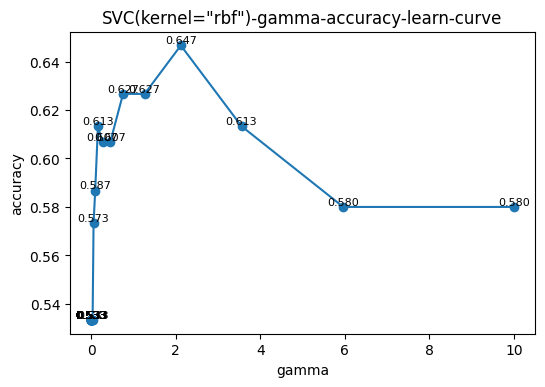

In [30]:
print(max(gamma_score), gamma_range[gamma_score.index(max(gamma_score))])
plt.figure(dpi=100)
plt.plot(gamma_range, gamma_score, marker='o')

for a, b in zip(gamma_range, gamma_score):
    plt.text(a, b, "{:.3f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('SVC(kernel="rbf")-gamma-accuracy-learn-curve')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.savefig('SVC(kernel=rbf)-Learn-curve2.png',facecolor='white')
plt.show()
 # 保存图片用的

### kernel="linear"  C=i

In [13]:
#调线性核函数
C_score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="linear", C=i,cache_size=5000).fit(Xtrain,Ytrain)
    C_score.append(clf.score(Xtest,Ytest))


0.6333333333333333 1.2340816326530613


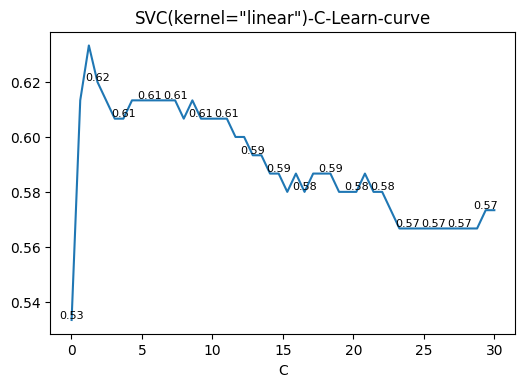

In [14]:
print(max(C_score), C_range[C_score.index(max(C_score))])
plt.figure(dpi=100)
plt.plot(C_range, C_score)

idx = slice(0, -1, 3)
for a, b in zip(C_range[idx], C_score[idx]):
    plt.text(a, b, "{:.2f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('SVC(kernel="linear")-C-Learn-curve')
plt.xlabel('C',color='black')
plt.savefig('SVC(kernel=linear)-Learn-curve.png',facecolor='white')
plt.show()

### kernel="rbf",C=i

In [15]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i, gamma = 2.1209508879201926,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))


0.6333333333333333 1.2340816326530613


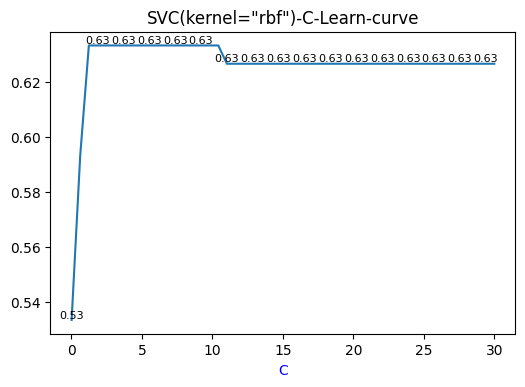

In [19]:
  
print(max(score), C_range[score.index(max(score))])

plt.figure(dpi=100)
plt.plot(C_range, score)

idx = slice(0, -1, 3)
for a, b in zip(C_range[idx], score[idx]):
    plt.text(a, b, "{:.2f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('SVC(kernel="rbf")-C-Learn-curve')
plt.savefig('SVC(kernel=rbf)-Learn-curve-2.png',facecolor='white')
plt.xlabel('C',color='blue')
plt.show()

###  进一步细化

In [35]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,
                cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))


0.5933333333333334 6.877551020408163


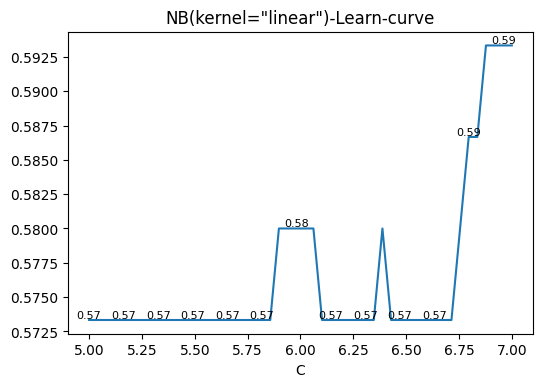

In [36]:
  
print(max(score), C_range[score.index(max(score))])
plt.figure(dpi=100)
plt.plot(C_range, score)

idx = slice(0, -1, 4)
for a, b in zip(C_range[idx], score[idx]):
    plt.text(a, b, "{:.2f}".format(b), ha='center', va='bottom', fontsize=8)

plt.title('NB(kernel="linear")-Learn-curve')
plt.xlabel('C')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix as CM

In [ ]:
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)